# Assignment 1: Data Pre-processing
*By Sebastian Bentley (cph-sb287)*

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import random
import seaborn as sns
from sklearn import datasets, svm, tree, preprocessing, metrics

## Load the data

In [2]:
#Load the data, with header as the second row (heder 1)
red_df = pd.read_excel('../soft2022spring-DS/Data/winequality-red.xlsx', header=1)
white_df = pd.read_excel('../soft2022spring-DS/Data/winequality-white.xlsx', header=1)

#Insert type column for each dataframe
red_df.insert(len(red_df.columns), 'type', 'red')
white_df.insert(len(white_df.columns), 'type', 'white')

#Join the files to one
df = pd.concat([red_df, white_df])
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white  

[6497 rows x 13 columns]

## Explore the data

In [3]:
#Explore the general parameters of the new
rows_count = len(df.index)
colums_count = len(df.columns)
types = df.dtypes

print("number of rows:", rows_count, "\nnumber of colums:", colums_count)
print("\ntypes: \n", types)
df.describe()

number of rows: 6497 
number of colums: 13

types: 
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

type
red      5.636023
white    5.877909
Name: quality, dtype: float64


<AxesSubplot:xlabel='type'>

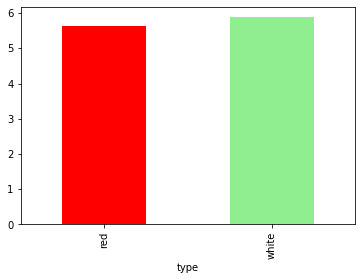

In [4]:
#Plot diagrams that visualize the differences in red and white wines
#Best average quality
quality_mean = df.groupby('type')['quality'].mean()
print(quality_mean)
quality_mean.plot(kind='bar', color=['red', 'lightgreen'])

type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64


<AxesSubplot:ylabel='alcohol'>

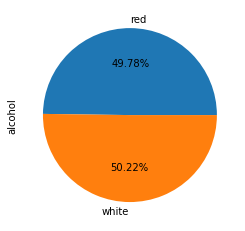

In [5]:
#Most average alcohol
alcohol_mean = df.groupby('type')['alcohol'].mean()
print(alcohol_mean)
alcohol_mean.plot(kind='pie',  autopct='%1.2f%%')

type
red      2.538806
white    6.391415
Name: residual sugar, dtype: float64


<AxesSubplot:xlabel='type'>

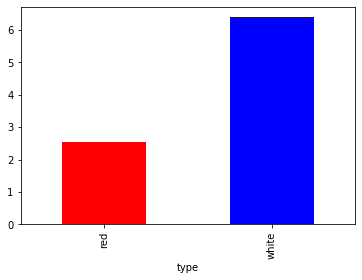

In [6]:
#Most residual suger average
residual_suger = df.groupby('type')['residual sugar'].mean()
print(residual_suger)
residual_suger.plot(kind='bar', color=['red', 'blue'])

In [7]:
#Split the data into five/ten subsets by binning the attribute pH
import numpy as np
min_ph = df['pH'].min()
max_ph = df['pH'].max()
bins = np.linspace(min_ph, max_ph, 11)
ph_bins = df.groupby([pd.cut(df.pH, bins)])

#Bin with highest density
max_density = ph_bins.density.max()
print("Densities:", max_density)
print("\nMax density", max_density[max_density == max_density.max()])

Densities: pH
(2.72, 2.849]     0.99960
(2.849, 2.978]    1.00320
(2.978, 3.107]    1.00295
(3.107, 3.236]    1.01030
(3.236, 3.365]    1.00260
(3.365, 3.494]    1.03898
(3.494, 3.623]    1.00040
(3.623, 3.752]    0.99940
(3.752, 3.881]    0.99590
(3.881, 4.01]     0.99340
Name: density, dtype: float64

Max density pH
(3.365, 3.494]    1.03898
Name: density, dtype: float64


Quality correlation all wines:
 quality    1.000000
alcohol    0.444319
Name: quality, dtype: float64

Quality correlation red wines:
 quality    1.000000
alcohol    0.476166
Name: quality, dtype: float64

Quality correlation white wines:
 quality    1.000000
alcohol    0.435575
Name: quality, dtype: float64


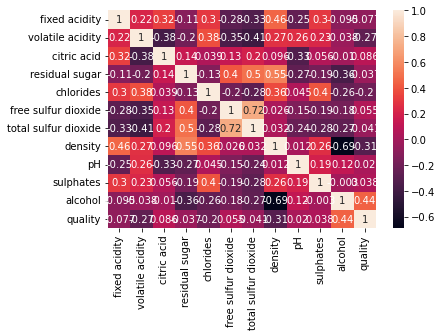

In [8]:
#Use the function corr() to create a correlation matrix of all data and investigate it.
sns.heatmap(df.corr(), annot=True)


#What has the highest average correlation:
quality_mean = df.corr()
print("Quality correlation all wines:\n", quality_mean.quality.nlargest(2))

#Red wine:
quality_mean_red = df[df.type == 'red'].corr().quality.nlargest(2)
print("\nQuality correlation red wines:\n", quality_mean_red)


#White wine:
quality_mean_white = df[df.type == 'white'].corr().quality.nlargest(2)
print("\nQuality correlation white wines:\n", quality_mean_white)

## Prepare the data for further analysis

In [9]:
#Search the data for allocation missing values and cells with a value og zero.

#There are not missing values
print(df.isnull().sum())

#Replace zeroes with average
for i in df.columns:
    if type(df[i]) == float:
        df[i]=df[i].replace(0, df[i].mean())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


<AxesSubplot:xlabel='residual sugar'>

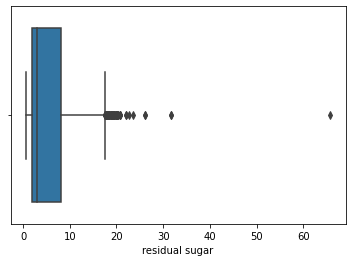

In [10]:
#Explore the feature ‘residual sugar’. Is there any outlier
sns.boxplot(x = df['residual sugar'])

In [11]:
#Outliner row:
outliner = df[df['residual sugar'] == df['residual sugar'].max()]
outliner

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2781            7.8             0.965          0.6            65.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2781                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  quality   type  
2781     11.7        6  white

In [12]:
#Drop outliner:
df = df.drop(outliner.index)

In [13]:
#Identify the attribute with the lowest correlation to the wine quality and remove it.
corr_min = df.corr().quality
print(corr_min[corr_min == corr_min.min()])
df = df.drop('density', axis=1)

density   -0.311608
Name: quality, dtype: float64


In [14]:
#transform categorical data into numeric
le = preprocessing.LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [15]:
#print out the start and the end of the preprocessed data frame
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                    11.0                  34.0  3.51       0.56      9.4   
1                    25.0                  67.0  3.20       0.68      9.8   
2                    15.0                  54.0  3.26       0.65      9.8   
3                    17.0                  60.0  3.16       0.58      9.8   
4                    11.0                  34.0  3.51       0.56      9.4   
...                   ...                   ...   ...        ...      ...   
4893                 24.0                  92.0  3.27       0.50     11.2   
4894                 57.0                 168.0  3.15       0.46      9.6   
4895                 30.0                 111.0  2.99       0.46      9.4   
4896                 20.0                 110.0  3.34       0.38     12.8   
4897                 22.0                  98.0  3.26       0.32     11.8   

      quality  type  
0           5     0  
1           5     0  
2           5     0  
3           6     0  
4           5     0  
...       ...   ...  
4893        6     1  
4894        5     1  
4895        6     1  
4896        7     1  
4897        6     1  

[6496 rows x 12 columns]